In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [16]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Closing Price Analysis

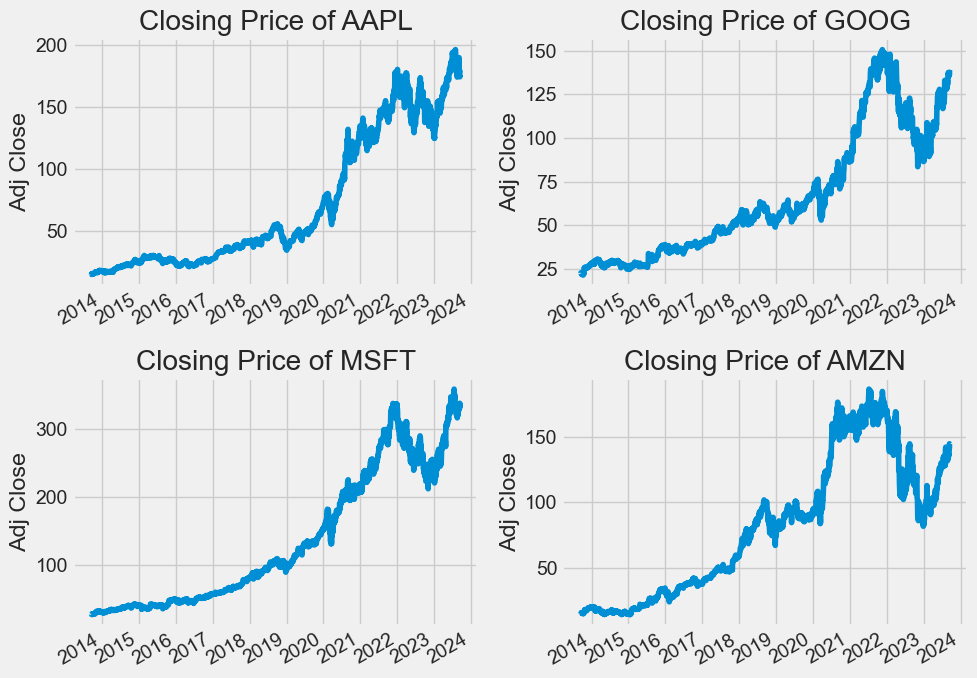

In [3]:
## historical view of the closing price
plt.figure(figsize=(10, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Simple Moving Average

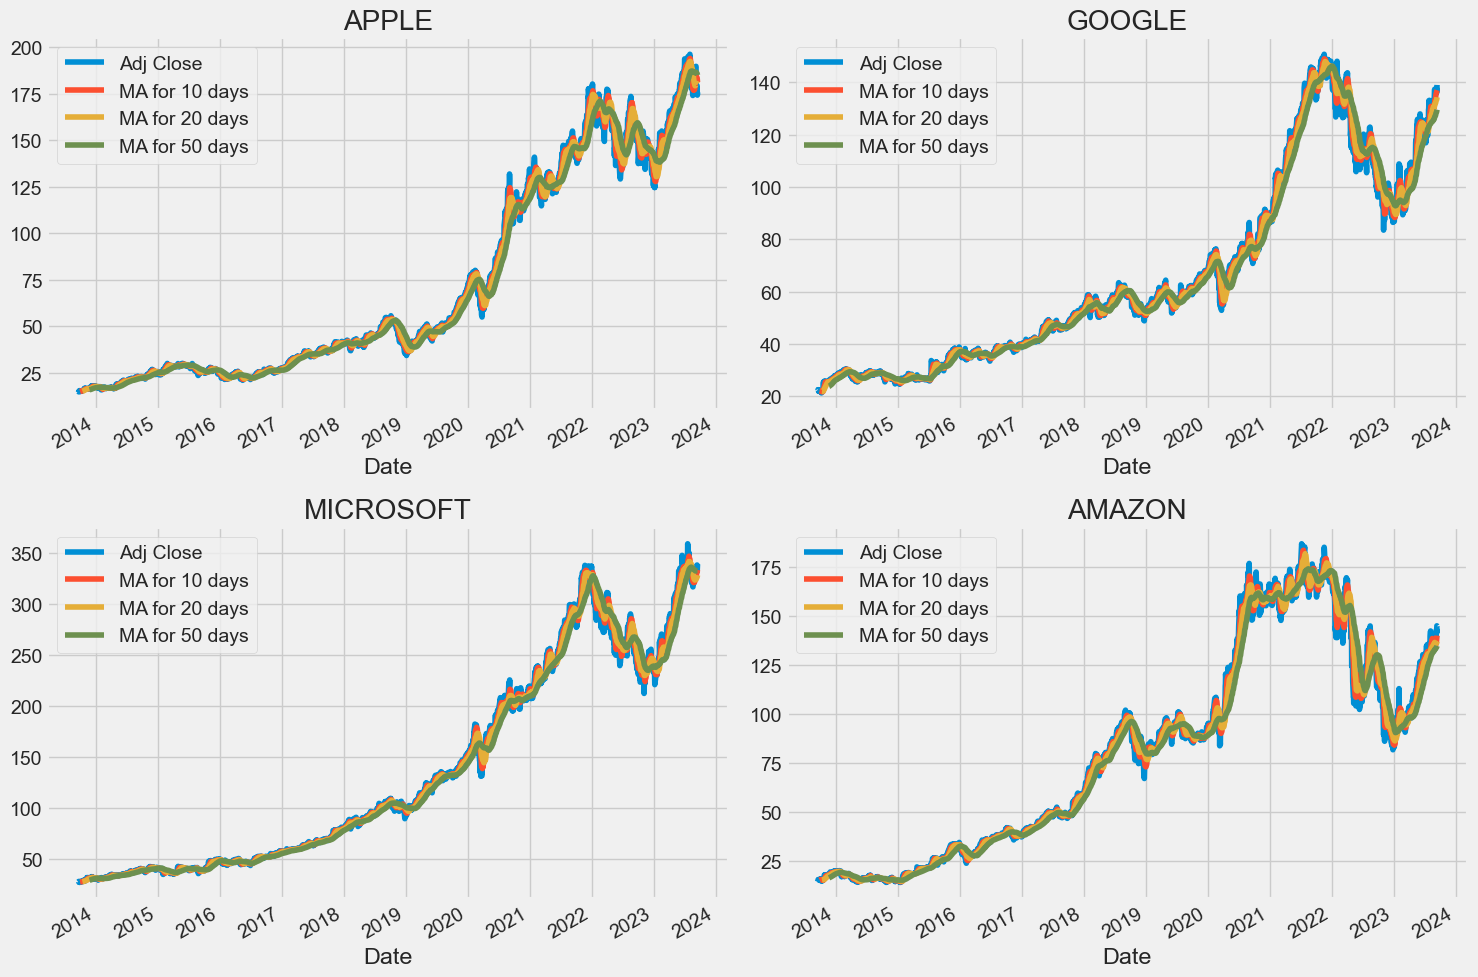

In [4]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Daily Returns On Stock (AVG)

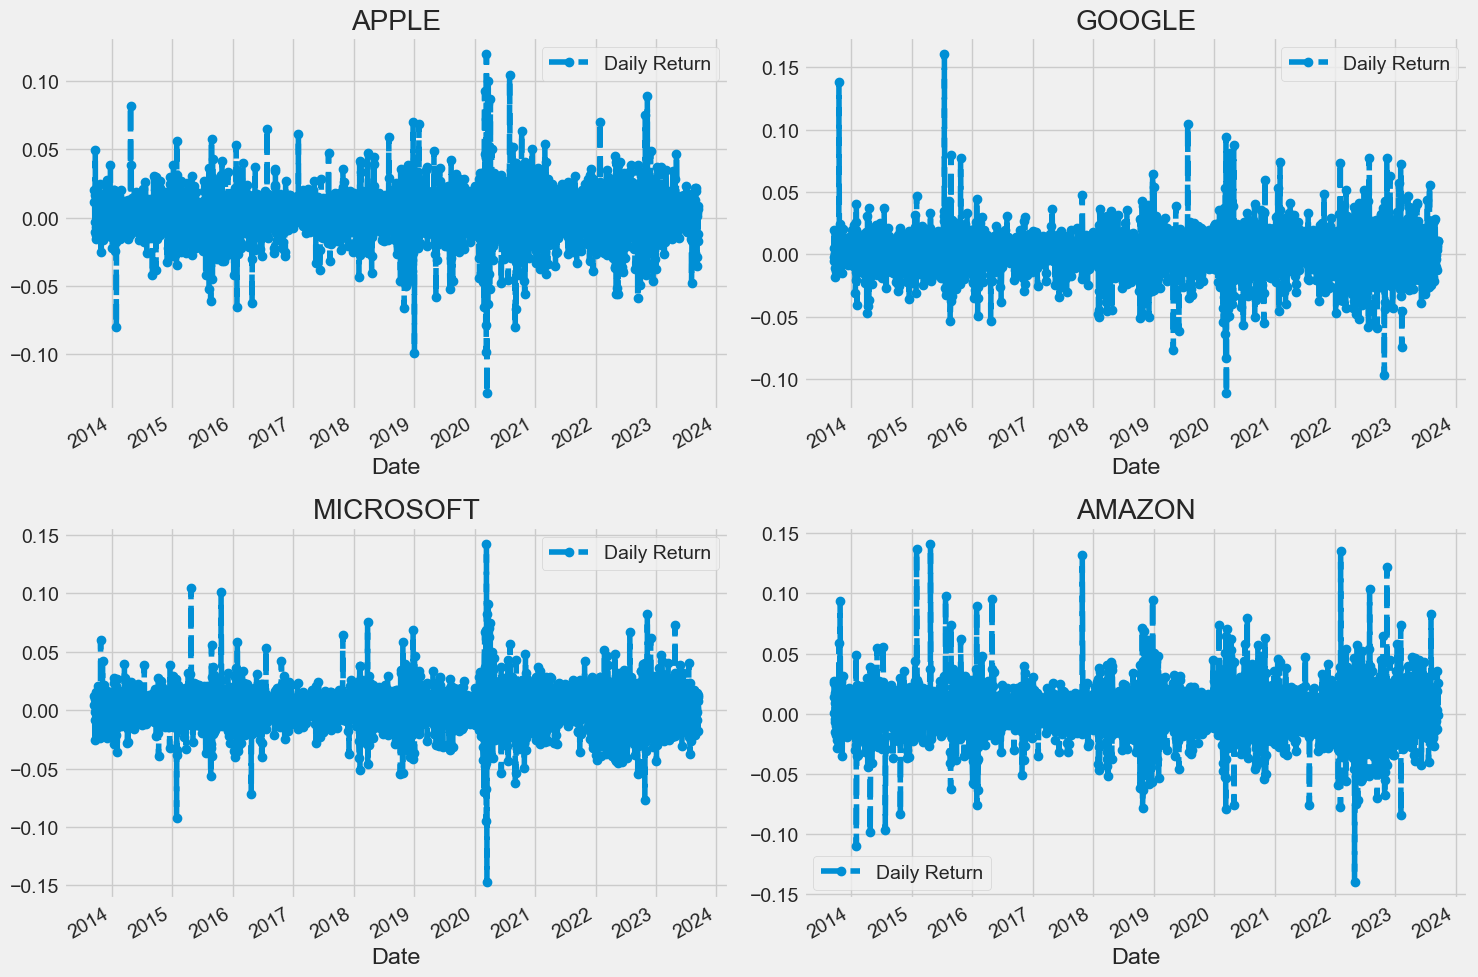

In [5]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Distribution Plot Of Returns

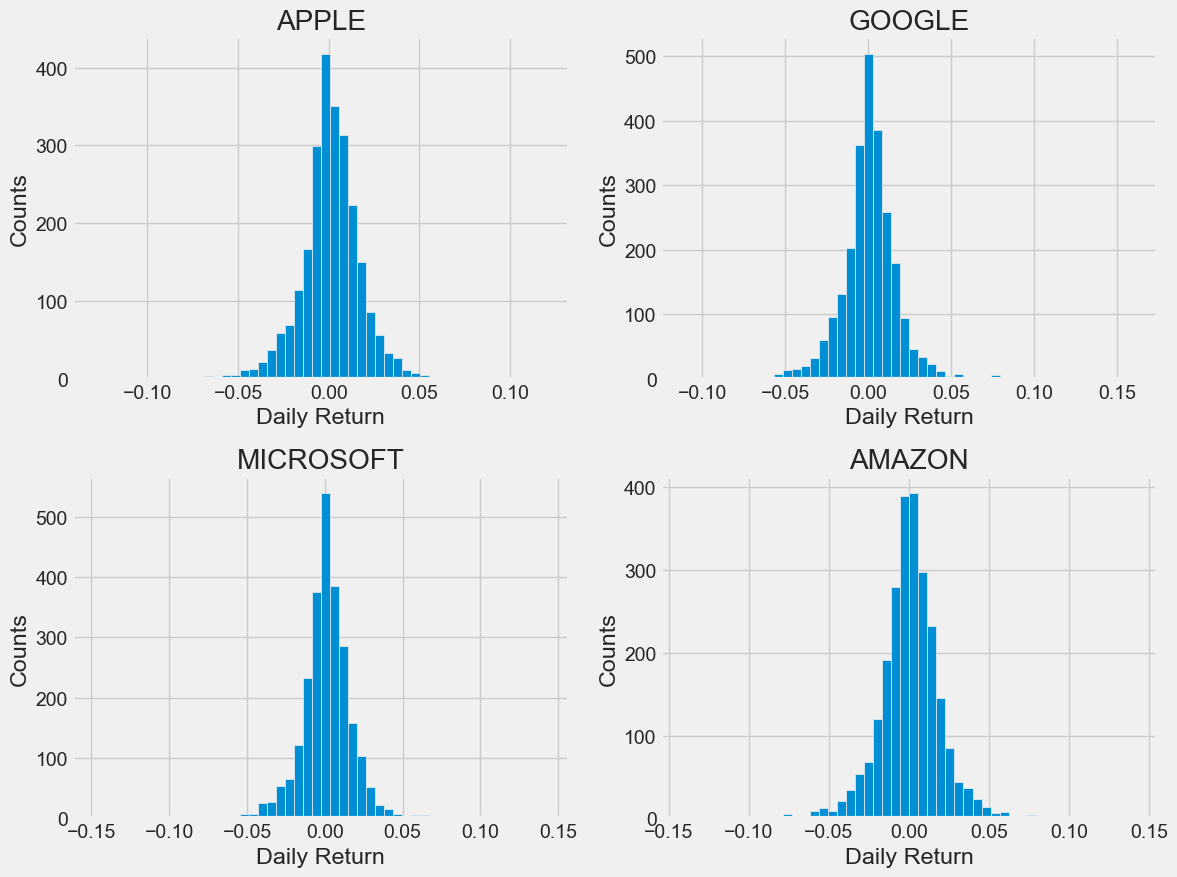

In [6]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## Correlation Plot

In [7]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2013-09-16,NaN,NaN,NaN,NaN
2013-09-17,0.011553,0.027393,-0.001859,0.003964
2013-09-18,0.020557,0.025841,0.019422,0.011843
2013-09-19,0.016398,0.000096,-0.005458,0.009604
2013-09-20,-0.010354,0.013715,0.005254,-0.025268


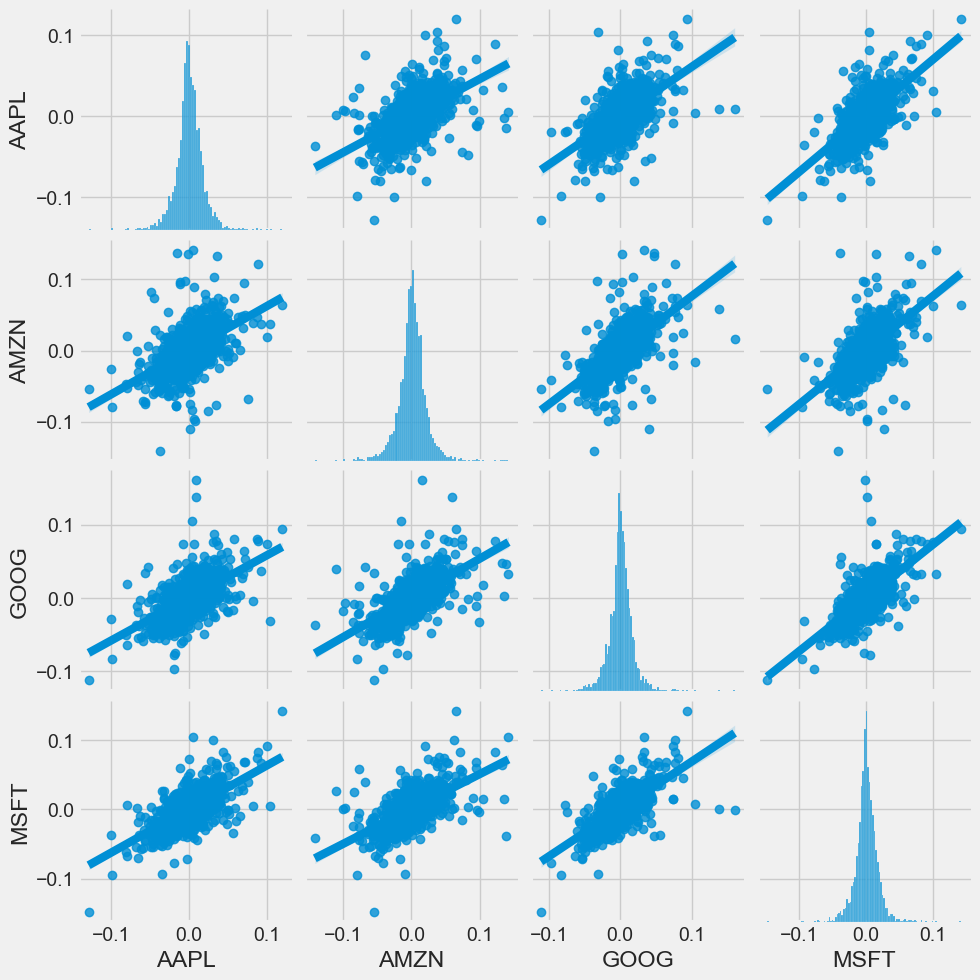

In [8]:
sns.pairplot(tech_rets, kind='reg')

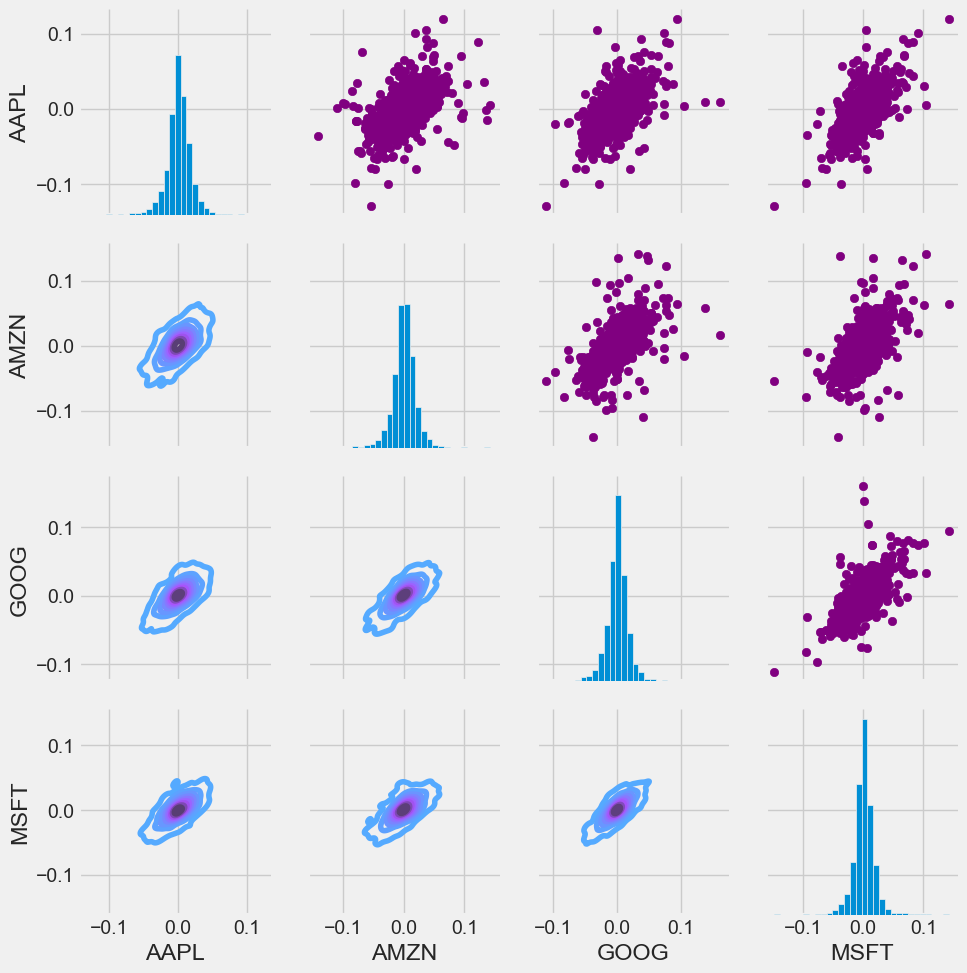

In [9]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

In [10]:
stock_return_corr = tech_rets.corr()

fig = px.imshow(stock_return_corr,
                color_continuous_scale='RdBu',
                labels=dict(x="Features", y="Features", color="Correlation"),
                title="Correlation Heatmap")

# Create annotations for correlation values
annotations = []
for i in range(len(stock_return_corr)):
    for j in range(len(stock_return_corr)):
        annotations.append(
            dict(
                x=stock_return_corr.columns[i],
                y=stock_return_corr.columns[j],
                text=str(round(stock_return_corr.iloc[i, j], 2)),
                showarrow=False,
                font=dict(color='white')
            )
        )

# Add annotations to the heatmap
fig.update_layout(annotations=annotations)

# Update layout
fig.update_layout(
    width=1000,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
)

fig.show()

In [11]:
closing_price_corr = closing_df.corr()

fig = px.imshow(stock_return_corr,
                color_continuous_scale='RdBu',
                labels=dict(x="Features", y="Features", color="Correlation"),
                title="Correlation Heatmap")

# Create annotations for correlation values
annotations = []
for i in range(len(stock_return_corr)):
    for j in range(len(stock_return_corr)):
        annotations.append(
            dict(
                x=stock_return_corr.columns[i],
                y=stock_return_corr.columns[j],
                text=str(round(stock_return_corr.iloc[i, j], 2)),
                showarrow=False,
                font=dict(color='white')
            )
        )

# Add annotations to the heatmap
fig.update_layout(annotations=annotations)

# Update layout
fig.update_layout(
    width=1000,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
)

fig.show()

## Investment Risk

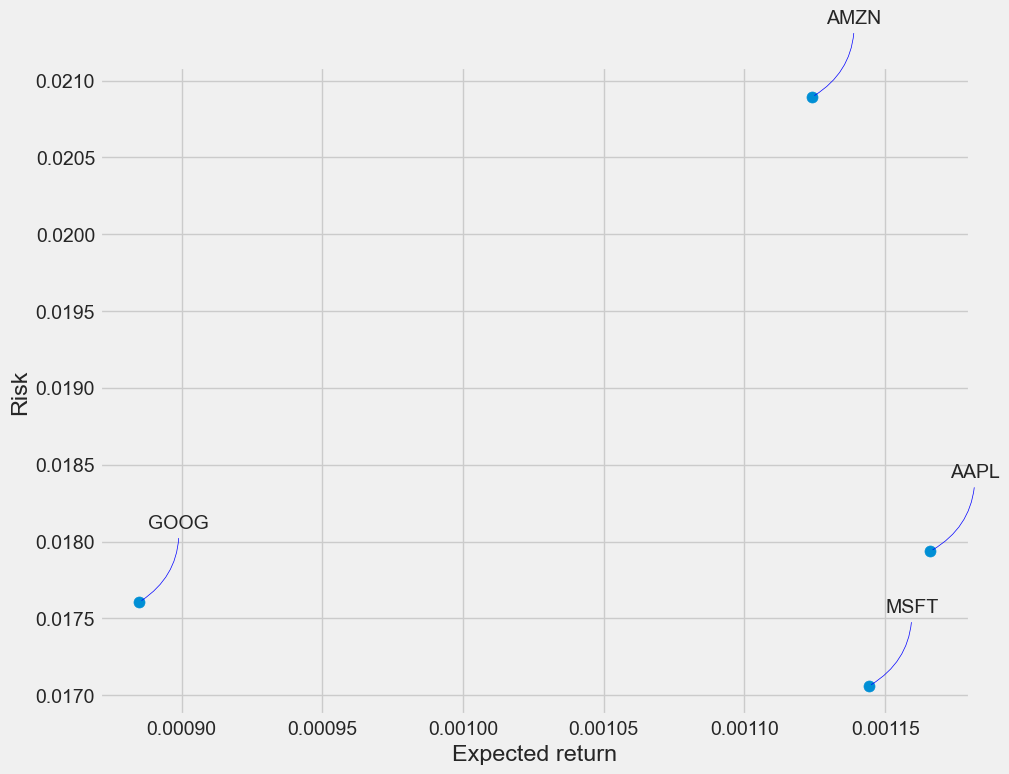

In [12]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [20]:
# Calculate moving averages
windows = [5, 10, 15, 20, 30, 60]
for window in windows:
    AAPL[f'MA_{window}'] = AAPL['Close'].rolling(window=window).mean()

# Reset the index to make 'Date' a regular column (optional)
# df.reset_index(inplace=True)

# Create a line chart with Plotly Express
fig = px.line(AAPL, x=AAPL.index, y=AAPL.columns[-len(windows):], labels={'variable': 'Moving Average'})
fig.update_layout(title='Moving Averages of Close Price', xaxis_title='Date', yaxis_title='Price')
fig.show()